# Sentiment Analysis of E-Commerce Product Reviews

## **Import Packages**

In [1]:
# Import the numpy, pandas and other required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import string
from sklearn.svm import LinearSVC
from wordcloud import WordCloud, STOPWORDS
import missingno as msno
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from spellchecker import SpellChecker
import re
import nltk

In [3]:
# spell checker
#!pip install pyspellchecker

## **Load the Dataset**

In [4]:
#from google.colab import files
#uploaded= files.upload()

In [5]:
#df_online_product = pd.read_csv("/content/drive/My Drive/GrammarandProductReviews.csv")
#df = pd.read_csv("./Updated_GrammarandProductReviews_SpellCorrector.csv")
df = pd.read_csv("GrammarandProductReviews.csv")

In [6]:
df.head(3)

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391


# **Text Pre-processing**

In [7]:
print("Shape :", df.shape)

Shape : (71044, 25)


In [8]:
print("Columns :")
print(df.columns)

Columns :
Index(['id', 'brand', 'categories', 'dateAdded', 'dateUpdated', 'ean', 'keys',
       'manufacturer', 'manufacturerNumber', 'name', 'reviews.date',
       'reviews.dateAdded', 'reviews.dateSeen', 'reviews.didPurchase',
       'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'upc'],
      dtype='object')


### **Rename the Columns**

In [9]:
# Rename the column names
col_names = df.columns
new_col_names = [i.replace(".","_") for i in col_names]
df.columns = new_col_names

In [10]:
df.columns

Index(['id', 'brand', 'categories', 'dateAdded', 'dateUpdated', 'ean', 'keys',
       'manufacturer', 'manufacturerNumber', 'name', 'reviews_date',
       'reviews_dateAdded', 'reviews_dateSeen', 'reviews_didPurchase',
       'reviews_doRecommend', 'reviews_id', 'reviews_numHelpful',
       'reviews_rating', 'reviews_sourceURLs', 'reviews_text', 'reviews_title',
       'reviews_userCity', 'reviews_userProvince', 'reviews_username', 'upc'],
      dtype='object')

In [11]:
print("Datatypes :\n",df.dtypes)

Datatypes :
 id                       object
brand                    object
categories               object
dateAdded                object
dateUpdated              object
ean                      object
keys                     object
manufacturer             object
manufacturerNumber       object
name                     object
reviews_date             object
reviews_dateAdded        object
reviews_dateSeen         object
reviews_didPurchase      object
reviews_doRecommend      object
reviews_id              float64
reviews_numHelpful      float64
reviews_rating            int64
reviews_sourceURLs       object
reviews_text             object
reviews_title            object
reviews_userCity         object
reviews_userProvince     object
reviews_username         object
upc                      object
dtype: object


In [12]:
print("Info :")
print(df.info())

Info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71044 entries, 0 to 71043
Data columns (total 25 columns):
id                      71044 non-null object
brand                   71044 non-null object
categories              71044 non-null object
dateAdded               71044 non-null object
dateUpdated             71044 non-null object
ean                     39065 non-null object
keys                    71044 non-null object
manufacturer            70903 non-null object
manufacturerNumber      70841 non-null object
name                    71044 non-null object
reviews_date            70977 non-null object
reviews_dateAdded       71044 non-null object
reviews_dateSeen        71044 non-null object
reviews_didPurchase     32158 non-null object
reviews_doRecommend     60429 non-null object
reviews_id              32158 non-null float64
reviews_numHelpful      32508 non-null float64
reviews_rating          71044 non-null int64
reviews_sourceURLs      71044 non-null object
reviews_t

In [13]:
print("Missing Value Count :")
print(df.isnull().sum())

Missing Value Count :
id                          0
brand                       0
categories                  0
dateAdded                   0
dateUpdated                 0
ean                     31979
keys                        0
manufacturer              141
manufacturerNumber        203
name                        0
reviews_date               67
reviews_dateAdded           0
reviews_dateSeen            0
reviews_didPurchase     38886
reviews_doRecommend     10615
reviews_id              38886
reviews_numHelpful      38536
reviews_rating              0
reviews_sourceURLs          0
reviews_text               36
reviews_title             476
reviews_userCity        65634
reviews_userProvince    70595
reviews_username           96
upc                         2
dtype: int64


### **Percentage of missing values per column**

In [14]:
null_percent = round(100*(df.isnull().sum()/len(df.index)), 2)  # Creating a series with columns and it's null %
null_percent[null_percent > 0].sort_values(ascending=False)   # Printing only columns where null values are present

reviews_userProvince    99.37
reviews_userCity        92.39
reviews_id              54.74
reviews_didPurchase     54.74
reviews_numHelpful      54.24
ean                     45.01
reviews_doRecommend     14.94
reviews_title            0.67
manufacturerNumber       0.29
manufacturer             0.20
reviews_username         0.14
reviews_date             0.09
reviews_text             0.05
dtype: float64

In [15]:
#### Visualization of Missing Values

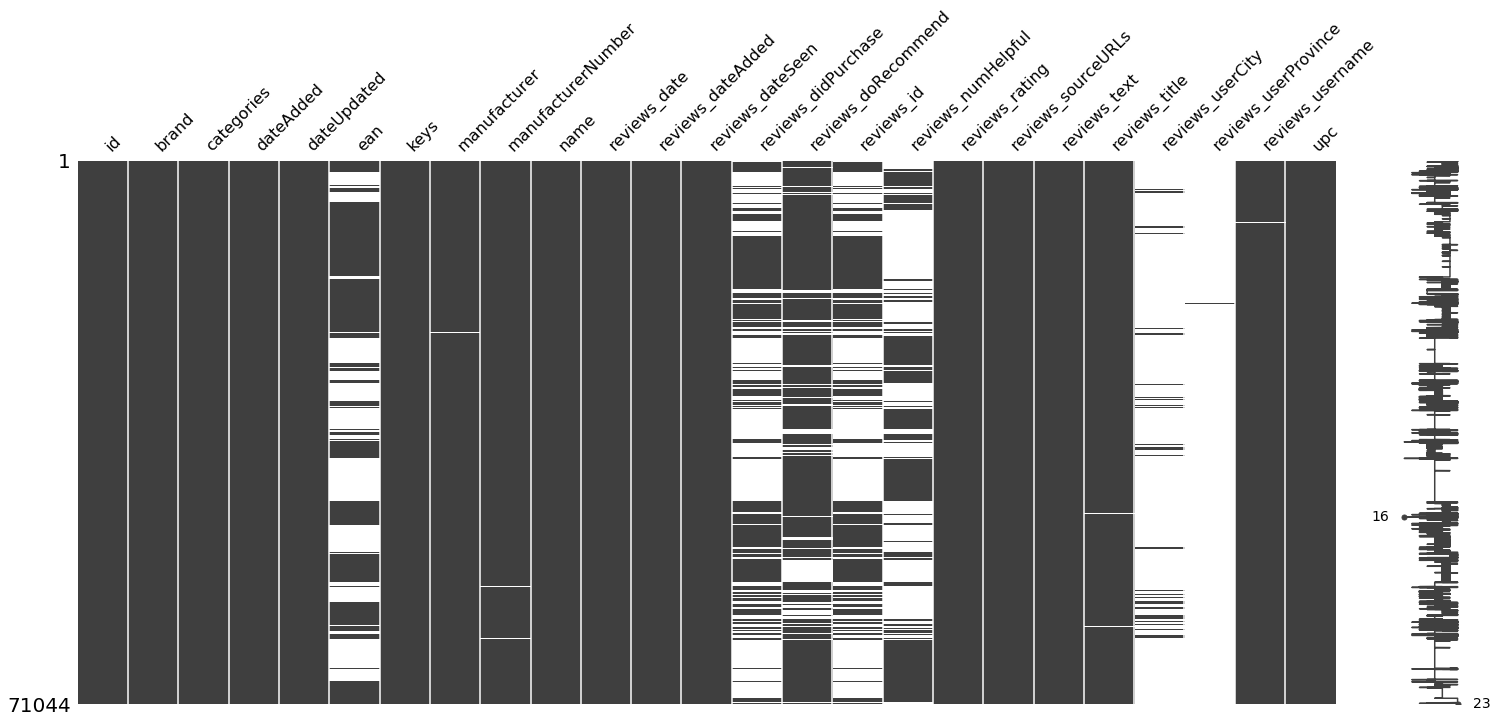

In [16]:
msno.matrix(df)

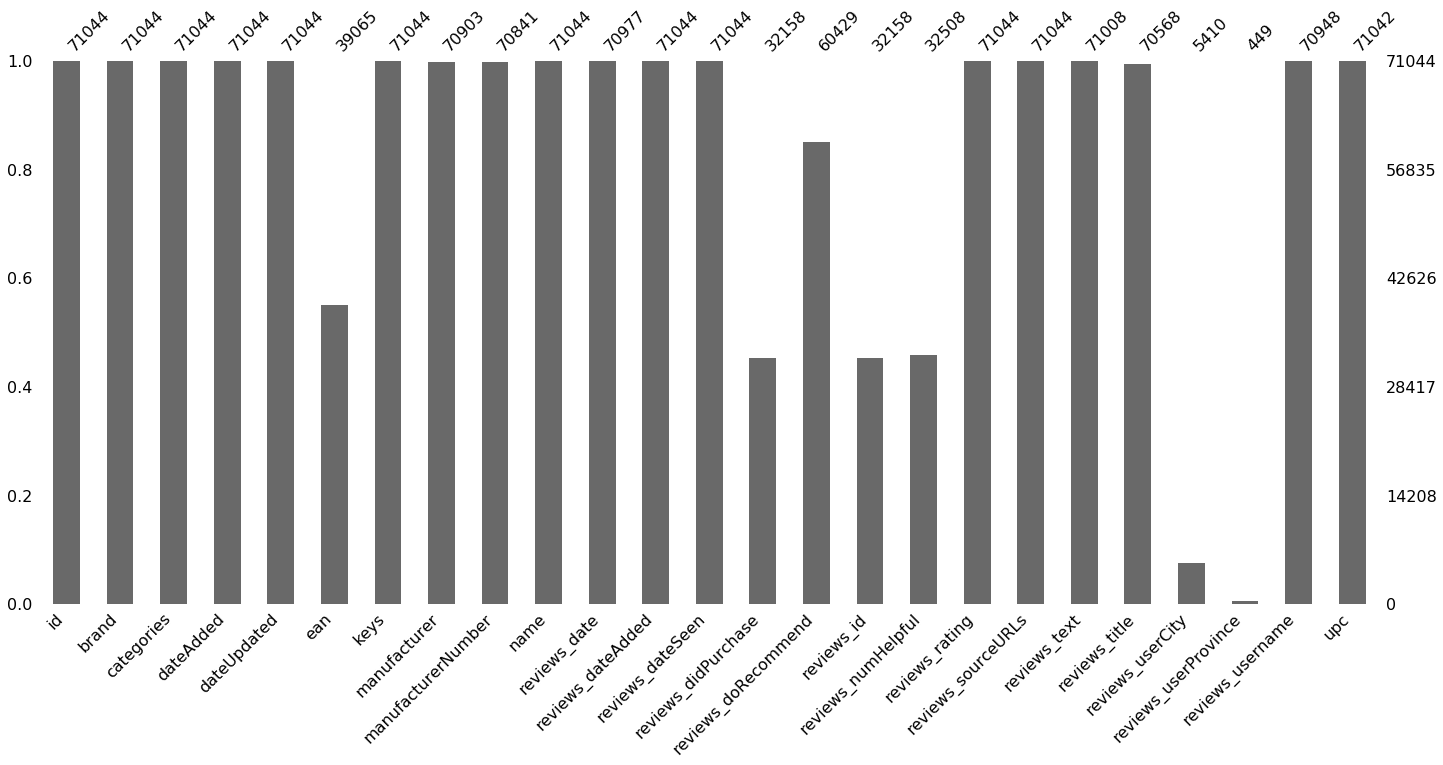

In [17]:
msno.bar(df)

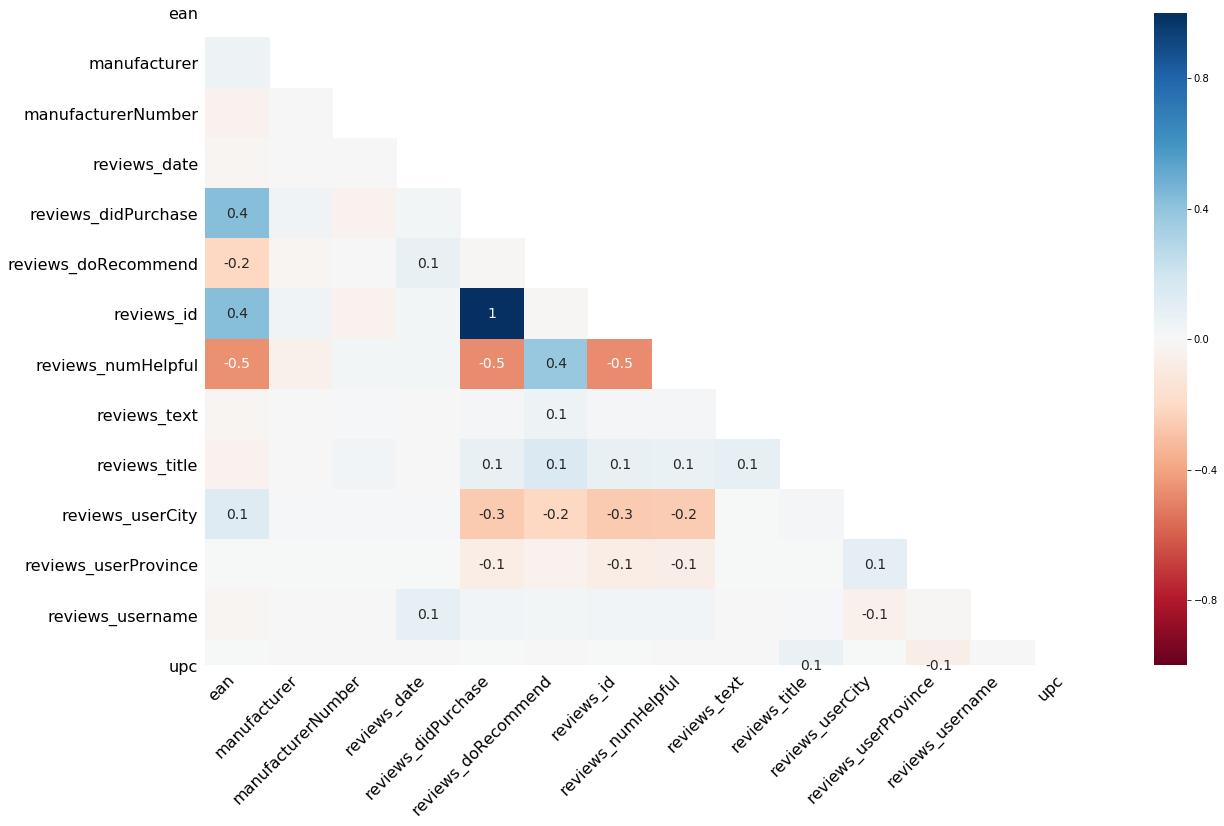

In [18]:
msno.heatmap(df)

In [19]:
df_copy = df.copy()

In [20]:
print("Shape :", df.shape)

Shape : (71044, 25)


In [21]:
null_percent=round(100*(df.isnull().sum()/len(df.index)), 2) # Missing % of each column
null_percent=null_percent[null_percent.values>60] # filtering only columns with missing % more than 60%
null_percent = list(null_percent.index) # storing index (column names) with missing% more than 80 in a list.
df.drop(labels=null_percent,axis=1,inplace=True)  # Dropping all those columns

In [22]:
# Shape of Dataset
print("Shape :", df.shape)

Shape : (71044, 23)


In [23]:
# removing rows where a particular column has high missing values because the column cannot be removed because of its importance
df = df[~pd.isnull(df['reviews_date'])]
df = df[~pd.isnull(df['reviews_text'])]

In [24]:
# Shape of Dataset
print("Shape :", df.shape)

Shape : (70941, 23)


In [25]:
df["reviews_text"].head(10)

0    i love this album. it's very good. more to the...
1    Good flavor. This review was collected as part...
2                                         Good flavor.
3    I read through the reviews on here before look...
4    My husband bought this gel for us. The gel cau...
5    My boyfriend and I bought this to spice things...
6    Bought this earlier today and was excited to c...
7    I bought this product for my husband and I to ...
8    My husband and I bought this for some extra fu...
9    Got as a surprise for my husband there is noth...
Name: reviews_text, dtype: object

In [26]:
pd.set_option('display.max_colwidth', 200)
#pd.set_option('display.max_colwidth', None)

In [27]:
df[['reviews_text','reviews_title']].head(10)

,reviews_text,reviews_title
0,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just c...,Just Awesome
1,Good flavor. This review was collected as part of a promotion.,Good
2,Good flavor.,Good
3,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, n...",Disappointed
4,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation
5,My boyfriend and I bought this to spice things up in the bedroom and we were both highly disappointed in this product. We bought this one because we absolutely love the ky yours and mine and we th...,Not worth it
6,Bought this earlier today and was excited to check it out. Based on the product description I was expecting something but it was just like the regular KY. We are fans of the his and hers so we jus...,Disappointing
7,I bought this product for my husband and I to try and we were not impressed at all. There was no tingling or warming. It left us both very sticky. I have used KY products in the past (loved KY his...,Not happy at all
8,My husband and I bought this for some extra fun. We werevboth extremely disappointed. Especially for the price! Do not waste your money on this product. We felt nothing but a sticky mess from it.,Very disappointing
9,Got as a surprise for my husband there is nothing special about it just a lube save the money and get plain KY if you just need a lube wish I could return it for a refund,Don't buy


### **Combine Review Text and Title into one**

In [28]:
df['reviews_text'] = df['reviews_title'].fillna('') + '! ' + df['reviews_text'].fillna('')

In [29]:
df["reviews_text"].head(10)

0    Just Awesome! i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaph...
1                                                                                                                                       Good! Good flavor. This review was collected as part of a promotion.
2                                                                                                                                                                                         Good! Good flavor.
3    Disappointed! I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. F...
4                                                           Irritation! My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I woul

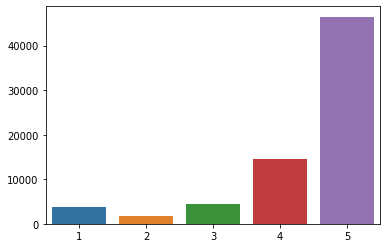

In [30]:
data = df['reviews_rating'].value_counts()
sns.barplot(x=data.index, y=data.values)

In [31]:
# Dropping column reviews_title
df = df.drop('reviews_title', axis=1)

## **Noise Removal**

### **Lowercasing**

In [32]:
df["reviews_text"] = df["reviews_text"].str.lower()
df["reviews_text"][5:10]

5    not worth it! my boyfriend and i bought this to spice things up in the bedroom and we were both highly disappointed in this product. we bought this one because we absolutely love the ky yours and ...
6    disappointing! bought this earlier today and was excited to check it out. based on the product description i was expecting something but it was just like the regular ky. we are fans of the his and...
7    not happy at all! i bought this product for my husband and i to try and we were not impressed at all. there was no tingling or warming. it left us both very sticky. i have used ky products in the ...
8    very disappointing! my husband and i bought this for some extra fun. we werevboth extremely disappointed. especially for the price! do not waste your money on this product. we felt nothing but a s...
9                      don't buy! got as a surprise for my husband there is nothing special about it just a lube save the money and get plain ky if you just need a lube wish i coul

### **Remove URL's**

In [33]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [34]:
df["reviews_text"][7249]

'u1l2d1! start working when mixed with water, which allows you to enjoy whiter laundry and cleaner surfaces without the spills. do not mix with bleach or other household products. always read and follow precautions and usage directions before using cleaning products read more at https://www.clorox.com/products/clorox-control-bleach-packs/va5foomhiiibyabv.99'

In [35]:
text = "Study dashboard home page is at https://study.com/v/item/524/dashboard/ please visit "
remove_urls(text)

'Study dashboard home page is at  please visit '

In [36]:
df["reviews_text"] = df["reviews_text"].apply(lambda text: remove_urls(text))

In [37]:
df["reviews_text"][7249]

'u1l2d1! start working when mixed with water, which allows you to enjoy whiter laundry and cleaner surfaces without the spills. do not mix with bleach or other household products. always read and follow precautions and usage directions before using cleaning products read more at '

### **Remove Punctuation**

In [38]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["reviews_text"] = df["reviews_text"].apply(lambda text: remove_punctuation(text))

In [39]:
PUNCT_TO_REMOVE

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [40]:
df["reviews_text"].head(10)

0    just awesome i love this album its very good more to the hip hop side than her current pop sound so hype i listen to this everyday at the gym i give it 5star rating all the way her metaphors are j...
1                                                                                                                                          good good flavor this review was collected as part of a promotion
2                                                                                                                                                                                           good good flavor
3    disappointed i read through the reviews on here before looking in to buying one of the couples lubricants and was ultimately disappointed that it didnt even live up to the reviews i had read for s...
4                                                                irritation my husband bought this gel for us the gel caused irritation and it felt like it was burning my skin i wo

In [41]:
print("Shape :", df.shape)

Shape : (70941, 22)


### **Remove Stopwords**

In [42]:
##import nltk
##nltk.download('stopwords')

In [43]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["reviews_text"] = df["reviews_text"].apply(lambda text: remove_stopwords(text))

In [44]:
df["reviews_text"][5:10]

5    worth boyfriend bought spice things bedroom highly disappointed product bought one absolutely love ky mine thought would similar affect absolutely nothing buy
6             disappointing bought earlier today excited check based product description expecting something like regular ky fans expected left little disappointed
7                                       happy bought product husband try impressed tingling warming left us sticky used ky products past loved ky one disappointing
8                             disappointing husband bought extra fun werevboth extremely disappointed especially price waste money product felt nothing sticky mess
9                                                     dont buy got surprise husband nothing special lube save money get plain ky need lube wish could return refund
Name: reviews_text, dtype: object

### **Lemmatization**

In [45]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

In [46]:
#import nltk
#nltk.download('wordnet')

In [47]:
df["reviews_text"] = df["reviews_text"].apply(lambda text: lemmatize_words(text))

In [48]:
df["reviews_text"][5:10]

5    worth boyfriend bought spice thing bedroom highly disappointed product bought one absolutely love ky mine thought would similar affect absolutely nothing buy
6             disappointing bought earlier today excited check based product description expecting something like regular ky fan expected left little disappointed
7                                        happy bought product husband try impressed tingling warming left u sticky used ky product past loved ky one disappointing
8                            disappointing husband bought extra fun werevboth extremely disappointed especially price waste money product felt nothing sticky mess
9                                                    dont buy got surprise husband nothing special lube save money get plain ky need lube wish could return refund
Name: reviews_text, dtype: object

### **Spelling Correction**

In [49]:
spell = SpellChecker()
df["reviews_text"] = df["reviews_text"].apply(lambda text:' '.join(spell.correction(word) for word in nltk.word_tokenize(text)))

KeyboardInterrupt: 

In [ ]:
##import nltk
##nltk.download('punkt')

In [ ]:
df["reviews_text"][5:10]

### **HTML Tags Removal**

In [ ]:
def scrub_words(text):
    # remove html markup
    text=re.sub("(<.*?>)","",text)
    
    # remove non ASCII and digits
    text=re.sub("(\\W|\\d)"," ",text)
    
    # remove whitespace
    text=text.strip()
    return text

In [ ]:
df["reviews_text"][5:10]

In [ ]:
df["reviews_text"] = df["reviews_text"].apply(lambda text: scrub_words(text))

In [ ]:
df["reviews_text"][5:10]

### **Numbers Removal**

In [ ]:
df['reviews_text'] = df['reviews_text'].apply(lambda x : re.sub(r'[^a-z]',' ',x))

In [ ]:
df["reviews_text"][5:10]

### Now let's have a look what do the length of the reviews tell about the ratings


In [ ]:
df['reviews_text'].apply(len)

### **Top 30 Common Words**

In [ ]:
from nltk.probability import FreqDist

In [ ]:
# Function to plot most frequent terms
def freq_words(x, terms=30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    
    fdist = FreqDist(all_words)
    words_df=pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
    
    # Selecting 30 least frequent words
    d = words_df.nlargest(columns='count', n=terms)
    plt.figure(figsize=(20,10))
    ax = sns.barplot(data=d, x="count", y="word")
    ax.set(ylabel="Word")
    plt.show()

In [ ]:
freq_words(df['reviews_text'])

### **Top 30 Rare Words**

In [ ]:
# Function to plot least frequent terms
def freq_words(x, terms=30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    
    fdist = FreqDist(all_words)
    words_df=pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
    
    # Selecting top 30 least frequent words
    d = words_df.nsmallest(columns='count', n=terms)
    plt.figure(figsize=(20,10))
    ax = sns.barplot(data=d, x="count", y="word")
    ax.set(ylabel="Word")
    plt.show()

In [ ]:
freq_words(df['reviews_text'])

### **N-grams using TextBlob**

In [ ]:
from textblob import TextBlob

In [ ]:
# Function to generate n-grams from sentences.
def extract_ngrams(data, num):
    n_grams = TextBlob(data).ngrams(num)
    return [ ' '.join(grams) for grams in n_grams]

In [ ]:
data = df['reviews_text'][1:10]
data

In [ ]:
for i in data:
    print("1-gram: ", extract_ngrams(i, 1))

In [ ]:
for i in data:
    print("1-gram: ", extract_ngrams(i, 2))

In [ ]:
for i in data:
    print("1-gram: ", extract_ngrams(i, 3))

In [ ]:
for i in data:
    print("1-gram: ", extract_ngrams(i, 4))

# **Exploratory Data Analysis**

In [ ]:
df['reviews_text'].isnull().sum()

###  **So, What is the maximum no. of ratings that people gave?**

In [ ]:
df['reviews_rating'].value_counts()

### **Now, lets have a look what do the length of the reviews tell about the ratings**

In [ ]:
 df['reviews_text'].apply(len)

### **Word Clouds**

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title=None):
    wordcloud = WordCloud(
    background_color = 'black',
    stopwords=stopwords,
    max_words=200,
    max_font_size=40,
    scale=3,
    random_state=1 #choose at random
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(15,15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top = 2.3)
        
    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(df['reviews_text'])

In [ ]:
# alternate code, seems to yield different results
wordcloud = WordCloud(background_color='salmon', colormap='Pastel1',stopwords=stopwords, max_words=400, max_font_size=40, scale=30,
        random_state=1).generate_from_frequencies((df['reviews_text'].value_counts()  ))
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# try to tokenize to individual word (uni-gram) - reviews.title
split_title = []
listCounts = []
split_title = [x.split(" ") for x in df['reviews_text'].astype(str)]
big_list = []
for x in split_title:
    big_list.extend(x)

listCounts = pd.Series(big_list).value_counts()

wordcloud = WordCloud(background_color='white', max_words=400, max_font_size=40, scale=30,
        random_state=1).generate((listCounts[listCounts > 2]).to_string())
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### **Genuine Reviews**

In [ ]:
df.columns

In [ ]:
df["reviews_didPurchase"].head(2)

In [ ]:
# shoppers who did purchased the product and provided the review 
df['reviews_didPurchase'].fillna('Review N/A', inplace=True)

In [ ]:
plt.figure(figsize=(10,8))
ax=sns.countplot(df['reviews_didPurchase'])
ax.set_xlabel(xlabel="People's Reviews",fontsize=17)
ax.set_ylabel(ylabel='No. of Reviews',fontsize=17)
ax.axes.set_title('Genuine No. of Reviews',fontsize=17)
ax.tick_params(labelsize=13)

### **Correlation Map**

In [ ]:
sns.set(font_scale=1.4)
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,linewidths=.5)
b,t = plt.ylim()
b+=0.5
t-=0.5
plt.ylim(b,t)
plt.show()

### **Most Bought Product**

In [ ]:
df.head(2)

In [ ]:
df.columns

In [ ]:
df['name']

In [ ]:
df['name'].value_counts().sort_values(ascending=False).head(1)

#### 'Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total' is the most brought product

### **Most purchased Product - 5 Rating**

In [ ]:
df['reviews_rating'].head(3)

In [ ]:
df_mostpurchased=df[df.reviews_rating == 5]
df_mostpurchased.head(2)

In [ ]:
df_mostpurchased['name'].value_counts().sort_values(ascending=False).head(1)

#### 'Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total' is the Most purchased Product - 5 Rating

### **Most purchased Product - 1 Rating**

In [ ]:
df_mostpurchased_1=df[df.reviews_rating == 1]
df_mostpurchased_1.head(2)

In [ ]:
df_mostpurchased_1['name'].value_counts().sort_values(ascending=False).head(2)

#### 'Rubbermaid174 Reveal Spray Mop' is the Most purchased Product - 1 Rating

## **Topic Modelling - Count Vectorizer**

### **Gensim**

In [ ]:
x1=df['reviews_text'][:10]
x1.head(3)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# compute vector space with sklearn
vect = CountVectorizer(min_df=1, ngram_range=(1, 1), max_features=25000)
corpus_vect = vect.fit_transform(x1)
# each doc is a scipy sparse matrix
print(vect.vocabulary_)

In [ ]:
import gensim
# transform sparse matrix into gensim corpus
corpus_vect_gensim = gensim.matutils.Sparse2Corpus(corpus_vect, documents_columns=False)
lsi = gensim.models.LsiModel(corpus_vect_gensim, num_topics=4)
# I instead would like something like this line below
# lsi = gensim.models.LsiModel(corpus_vect_gensim, id2word=vect.vocabulary_, num_topics=2)
print(lsi.print_topics(2))

### **Latent Semantic Analysis**

In [ ]:
vectorizer = CountVectorizer()

counts_matrix = vectorizer.fit_transform(x1)

feature_names = vectorizer.get_feature_names()

count_matrix_df = pd.DataFrame(counts_matrix.toarray(), columns=feature_names)
#count_matrix_df.index = ['Document 1','Document 2','Document 3','Document 4']

#print("Word frequency matrix: \n", count_matrix_df)

In [ ]:
print("Word frequency matrix: \n", count_matrix_df)

## **Topic Modelling - TF-IDF Vectorizer**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

### **Gensim**

In [ ]:
vect1 = TfidfVectorizer(min_df=1, ngram_range=(1, 1), max_features=25000)
corpus_vect1 = vect1.fit_transform(x1)
# each doc is a scipy sparse matrix
print(vect1.vocabulary_)

In [ ]:
corpus_vect_gensim1 = gensim.matutils.Sparse2Corpus(corpus_vect1, documents_columns=False)
lsi1 = gensim.models.LsiModel(corpus_vect_gensim1, num_topics=4)
# I instead would like something like this line below
# lsi = gensim.models.LsiModel(corpus_vect_gensim, id2word=vect.vocabulary_, num_topics=2)
print(lsi1.print_topics(2))

### **Latent Semantic Analysis**

In [ ]:
# Topic Modeling with Matrix Factorization and LSA (Latent Semantic Analysis) aka Singular Value Decomposition (SVD)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
vectorizer = TfidfVectorizer(stop_words=stopwords,max_features=10000, max_df = 0.5,
                                    use_idf = True,
                                    ngram_range=(1,3))

X = vectorizer.fit_transform(x1)
print(X.shape)
print(feature_names)

num_clusters = 4

km = KMeans(n_clusters=num_clusters)
km.fit(X)
    
clusters = km.labels_.tolist()
print(clusters)

# **Training Data Preparation**

### **Using the n-gram tfidf vectorizer**

In [ ]:
import string
from sklearn.svm import LinearSVC
from wordcloud import WordCloud, STOPWORDS
import missingno as msno
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from spellchecker import SpellChecker
import re
import nltk

In [ ]:
# Import the numpy, pandas and other required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
all_text=df['reviews_text']
train_text=df['reviews_text']
y=df['reviews_rating']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [ ]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=10000)
word_vectorizer.fit(all_text)
train_word_features = word_vectorizer.transform(train_text)

In [ ]:
df2=pd.DataFrame(train_word_features.toarray(), columns = word_vectorizer.get_feature_names())

In [ ]:
df2.head(2)

In [ ]:
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    #stop_words='english',
    ngram_range=(2, 6),
    max_features=50000)
char_vectorizer.fit(all_text)
train_char_features = char_vectorizer.transform(train_text)

train_features = hstack([train_char_features, train_word_features])

In [ ]:
train_features.shape

### **Splitting the dataset into train and test**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_features, y,test_size=0.3,random_state=101)

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.model_selection import cross_val_score

# **ML Model**

### **Logistic Regression**

In [ ]:
##Logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr0 = LogisticRegression(solver='lbfgs',max_iter=1000)

In [ ]:
lr0.fit(X_train,y_train)

In [ ]:
preds=lr0.predict(X_test)

In [ ]:
rf_accuracy=metrics.accuracy_score(preds,y_test)
rf_accuracy

### **Random Forest Classifier**

In [ ]:
### Random forest classifier

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
preds2=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
rf_accuracy2=accuracy_score(preds2,y_test)
rf_accuracy2

### **XGBoost**

In [ ]:
### XGBoost

import xgboost as xgb
xgb=xgb.XGBClassifier()
xgb.fit(X_train,y_train)
preds3=xgb.predict(X_test)

In [ ]:
rf_accuracy3=accuracy_score(preds3,y_test)
rf_accuracy3

### **Naive Bayes**

In [ ]:
### Naive Bayes


from sklearn.naive_bayes import MultinomialNB        # using multiNomial Naive Bayes as classifier

clf= MultinomialNB()

clf.fit(X_train,y_train)
pred4= clf.predict(X_test)
##print(roc_auc_score(pred,y_test))

In [ ]:
rf_accuracy4=accuracy_score(pred4,y_test)
rf_accuracy4

# **Deep Learning Model**

### **Label the Ratings** 



In [ ]:
df.head(2)

In [ ]:
# To classify ratings<4 as sentiment, i.e. replace ratings less than 4 as not happy
# label 1= Happy having sentiment 'False'
# label 2= Unhappy having sentiment 'True'
df['sentiment'] = df['reviews_rating']<4

In [ ]:
### Keras Model

df[['sentiment','reviews_rating']].head(10)

In [ ]:
from sklearn.model_selection import train_test_split
train_text, test_text, train_y, test_y = train_test_split(df['reviews_text'],df['sentiment'],test_size = 0.3)

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.optimizers import Adam

In [ ]:
MAX_NB_WORDS = 20000

# get the raw text data
texts_train = train_text.astype(str)
texts_test = test_text.astype(str)

# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(nb_words=MAX_NB_WORDS, char_level=False)
tokenizer.fit_on_texts(texts_train)
sequences = tokenizer.texts_to_sequences(texts_train)
sequences_test = tokenizer.texts_to_sequences(texts_test)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

In [ ]:
MAX_SEQUENCE_LENGTH = 200
#pad sequences are used to bring all sentences to same size.
# pad sequences with 0s
x_train = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', x_train.shape)
print('Shape of data test tensor:', x_test.shape)


In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2,input_shape=(1,)))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, train_y,
          batch_size=128,
          epochs=10,
          validation_data=(x_test, test_y))

In [ ]:
df[['unhappy_customers','reviews_rating']] .head(10)

In [ ]:
df.columns

In [ ]:
df.head(3)

# **Product Recommendation**

In [ ]:

#import the reqired libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
#from sklearn.externals import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [ ]:
df_recommendation=df[['id','name','reviews_rating']]
df_recommendation.head(10)

In [ ]:
#Check the number of rows and columns
rows,columns=df_recommendation.shape
print('Number of rows: ',rows)
print('Number of columns: ',columns)

In [ ]:
#Taking subset of the dataset
df_recommendation1=df_recommendation.iloc[:50000,0:]

In [ ]:
df_recommendation1['reviews_rating'].describe().transpose()

In [ ]:
#Find the minimum and maximum ratings
print('Minimum rating is: %d' %(df_recommendation1.reviews_rating.min()))
print('Maximum rating is: %d' %(df_recommendation1.reviews_rating.max()))

In [ ]:

#Check for missing values
print('Number of missing values across columns: \n',df_recommendation.isnull().sum())

In [ ]:
# Check the distribution of the rating
with sns.axes_style('white'):
    g = sns.factorplot("reviews_rating", data=df_recommendation1, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

In [ ]:

# Number of unique user id  in the data
print('Number of unique users in Raw data = ', df_recommendation1['id'].nunique())
# Number of unique product id  in the data
print('Number of unique product in Raw data = ', df_recommendation1['name'].nunique())

In [ ]:
## Taking the subset of dataset to make it less sparse/ denser

In [ ]:
#Check the top 10 users based on ratings
most_rated=df_recommendation1.groupby('id').size().sort_values(ascending=False)[:10]
print('Top 10 users based on ratings: \n',most_rated)

In [ ]:
counts=df_recommendation1.id.value_counts()
df_recommendation1_demo=df_recommendation1[df_recommendation1.id.isin(counts[counts>=15].index)]
print('Number of users who have rated 25 or more items =', len(df_recommendation1_demo))
print('Number of unique users in the final data = ', df_recommendation1_demo['id'].nunique())
print('Number of unique products in the final data = ', df_recommendation1_demo['id'].nunique())

In [ ]:
df_recommendation1_demo.count()

In [ ]:
df_mid1=df_recommendation1_demo.groupby(['id','name']).mean().reset_index()
df_mid1.head(3)

In [ ]:
df_recommendation1_final=df_mid1[['id','name','reviews_rating']]
df_recommendation1_final.head(3)

In [ ]:
## ratings analysis in final dataset

In [ ]:
#constructing the pivot table
final_ratings_matrix = df_recommendation1_final.pivot(index = 'id', columns ='name', values = 'reviews_rating').fillna(0)
final_ratings_matrix.head()

In [ ]:
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

In [ ]:
#Calucating the density of the rating marix
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

In [ ]:
## Splitting the data

In [ ]:
#Split the data randomnly into train and test datasets into 70:30 ratio
train_data, test_data = train_test_split(df_recommendation1_final, test_size = 0.3, random_state=0)
train_data.head()

In [ ]:

print('Shape of training data: ',train_data.shape)
print('Shape of testing data: ',test_data.shape)

In [ ]:
### Building Popularity Recommder model

In [ ]:
train_data.head(3)

In [ ]:
#Count of user_id for each unique product as recommendation score 
train_data_grouped1 = train_data
train_data_grouped1['reviews_rating'] = train_data_grouped1['reviews_rating'].apply(np.ceil) 
train_data_grouped1.head()

In [ ]:
#Count of user_id for each unique product as recommendation score 
train_data_grouped = train_data_grouped1[['name','reviews_rating']]
train_data_grouped.rename(columns = {'reviews_rating': 'score'},inplace=True)
train_data_grouped.head(10)

In [ ]:

#Sort the products on recommendation score 
train_data_sort = train_data_grouped.sort_values(['score', 'name'], ascending = [0,1]) 
      
#Generate a recommendation rank based upon score 
train_data_sort['rank'] = train_data_sort['score'].rank(ascending=0, method='first') 
          
#Get the top 5 recommendations 
popularity_recommendations = train_data_sort.head(5) 
popularity_recommendations

In [ ]:
# Use popularity based recommender model to make predictions
def recommend(id):     
    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['id'] = id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations

In [ ]:

find_recom = [10,100,150]   # This list is user choice.
for i in find_recom:
    print("The list of recommendations for the userId: %d\n" %(i))
    print(recommend(i))    
    print("\n")

In [ ]:
### Building Collaborative Filtering recommender model

In [ ]:
train_data_grouped2 = test_data
train_data_grouped2['reviews_rating'] = train_data_grouped2['reviews_rating'].apply(np.ceil) 
train_data_grouped2.head()


In [ ]:
df_recommendation_CF = pd.concat([train_data, test_data]).reset_index()
df_recommendation_CF.head()

In [ ]:
## User Based Collaborative Filtering model

In [ ]:
# Matrix with row per 'user' and column per 'item' 
pivot_df = df_recommendation_CF.pivot(index = 'id', columns ='name', values = 'reviews_rating').fillna(0)
pivot_df.head()

In [ ]:
print('Shape of the pivot table: ', pivot_df.shape)

In [ ]:

#define user index from 0 to 10
pivot_df['user_index'] = np.arange(0, pivot_df.shape[0], 1)
pivot_df.head()

In [ ]:
pivot_df.set_index(['user_index'], inplace=True)
# Actual ratings given by users
pivot_df.head()

In [ ]:
## As this is a sparse matrix we will use SVD

In [ ]:
# Singular Value Decomposition
U, sigma, Vt = svds(pivot_df, k = 10)

In [ ]:
print('Left singular matrix: \n',U)

In [ ]:

print('Sigma: \n',sigma)

In [ ]:
# Construct diagonal array in SVD
sigma = np.diag(sigma)
print('Diagonal matrix: \n',sigma)

In [ ]:
print('Right singular matrix: \n',Vt)

In [ ]:

#Predicted ratings
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
# Convert predicted ratings to dataframe
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = pivot_df.columns)
preds_df.head()

In [ ]:
# Recommend the items with the highest predicted ratings

def recommend_items(userID, pivot_df, preds_df, num_recommendations):
    # index starts at 0  
    user_idx = userID-1 
    # Get and sort the user's ratings
    sorted_user_ratings = pivot_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_user_predictions = preds_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_predictions
    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    temp = temp.loc[temp.user_ratings == 0]   
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended items for user(user_id = {}):\n'.format(userID))
    print(temp.head(num_recommendations))

In [ ]:
userID = 4
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)

In [ ]:
userID = 6
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)

In [ ]:
userID = 8
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)

In [ ]:
### Since, it is a Collaborative recommender model, so, all the three users are given different recommendations based on users past behaviour.

In [ ]:
### Evaluation of Collabrative recommendation model

In [ ]:
# Actual ratings given by the users
final_ratings_matrix.head()

In [ ]:
# Average ACTUAL rating for each item
final_ratings_matrix.mean().head()

In [ ]:
# Predicted ratings 
preds_df.head()

In [ ]:
# Average PREDICTED rating for each item
preds_df.mean().head()

In [ ]:
rmse_df = pd.concat([final_ratings_matrix.mean(), preds_df.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)
rmse_df.head()

In [ ]:
RMSE = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('\nRMSE SVD Model = {} \n'.format(RMSE))

In [ ]:
### Getting top - K ( K = 5) recommendations

In [ ]:
# Enter 'userID' and 'num_recommendations' for the user #
userID = 9
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)

In [52]:
# Save the model
import joblib 

# Save the model as a pickle in a file 
##using this command we save the model
##joblib.dump(model, 'models/rf_model.pkl') 
##that same .pkl we will use

NameError: name 'model' is not defined